# MM958: Statistical Modelling and Analysis

## Part 2

### Packages Used

This report used R version 4.40, Visual Studio Code version 1.90 and IRkernal version 1.3.2. A number of packages within R were used and have been listed below:

In [4]:
# Load necessary libraries
library(ggplot2)
library(gridExtra)
library(knitr)
library(reshape2)

The file used in this report is shown below:

In [5]:
# Load the data
load("CHD.RData")
# Check the R Objects and see what was loaded - object called 'CHD'
ls()

[1] "CHD"

As per assignment instructions, a subsample of the data was create and a unique seed was used.

In [6]:
# Set Seed using student number for unique data
set.seed(202476449)
# Get row numbers to omit
z.omit <- sample(1:nrow(CHD), 20, replace=FALSE)
# Omit the rows
chd_data <- CHD[-z.omit,] 

In [7]:
# Set the plot background color to white
par(bg = "white")
# Turning off errors for readability
options(warn=0)

## Question 1

The dataset consists of 442 observations across 10 variables. The data includes integer variables (ind, sbp, typea, age), numeric variables (tobacco, ldl, adiposity, obesity, alcohol) measuring various health metrics, and a binary factor outcome (CHD) with levels "0" and "1" indicating coronary heart disease status. All predictor variables represent potential risk factors, with measurements ranging from physical characteristics (like systolic blood pressure and body mass index) to lifestyle factors (such as tobacco and alcohol consumption).

In [8]:
# Check number of rows and columns
dim(chd_data)

# Look at column names
names(chd_data)

# Look at the types of each of the variables
str(chd_data)

[1] 442  10

[1] "ind"       "sbp"       "tobacco"   "ldl"       "adiposity" "typea"    
 [7] "obesity"   "alcohol"   "age"       "CHD"

'data.frame':	442 obs. of  10 variables:
 $ ind      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sbp      : int  160 144 118 170 134 132 142 114 114 132 ...
 $ tobacco  : num  12 0.01 0.08 7.5 13.6 6.2 4.05 4.08 0 0 ...
 $ ldl      : num  5.73 4.41 3.48 6.41 3.5 6.47 3.38 4.59 3.83 5.8 ...
 $ adiposity: num  23.1 28.6 32.3 38 27.8 ...
 $ typea    : int  49 55 52 51 60 62 59 62 49 69 ...
 $ obesity  : num  25.3 28.9 29.1 32 26 ...
 $ alcohol  : num  97.2 2.06 3.81 24.26 57.34 ...
 $ age      : int  52 63 46 58 49 45 38 58 29 53 ...
 $ CHD      : Factor w/ 2 levels "0","1": 2 2 1 2 2 1 1 2 1 2 ...


Based on the boxplots, we can see several notable relationships between risk factors and CHD status. Individuals with CHD (status=1) tend to have higher systolic blood pressure (median ~140 mmHg vs ~130 mmHg for non-CHD) and notably higher tobacco consumption. LDL cholesterol and adiposity also show clear differences, with CHD patients having higher median values in both measures. Age demonstrates one of the strongest relationships, with CHD patients typically being older (median ~52 years vs ~40 years for non-CHD). Type A behavior scores and obesity show slight elevations in the CHD group, though the differences are less pronounced. Alcohol consumption shows similar distributions between groups, suggesting a weaker relationship with CHD status. Additionally, most variables display some outliers (particularly in tobacco and alcohol consumption), which should be considered in subsequent analyses.

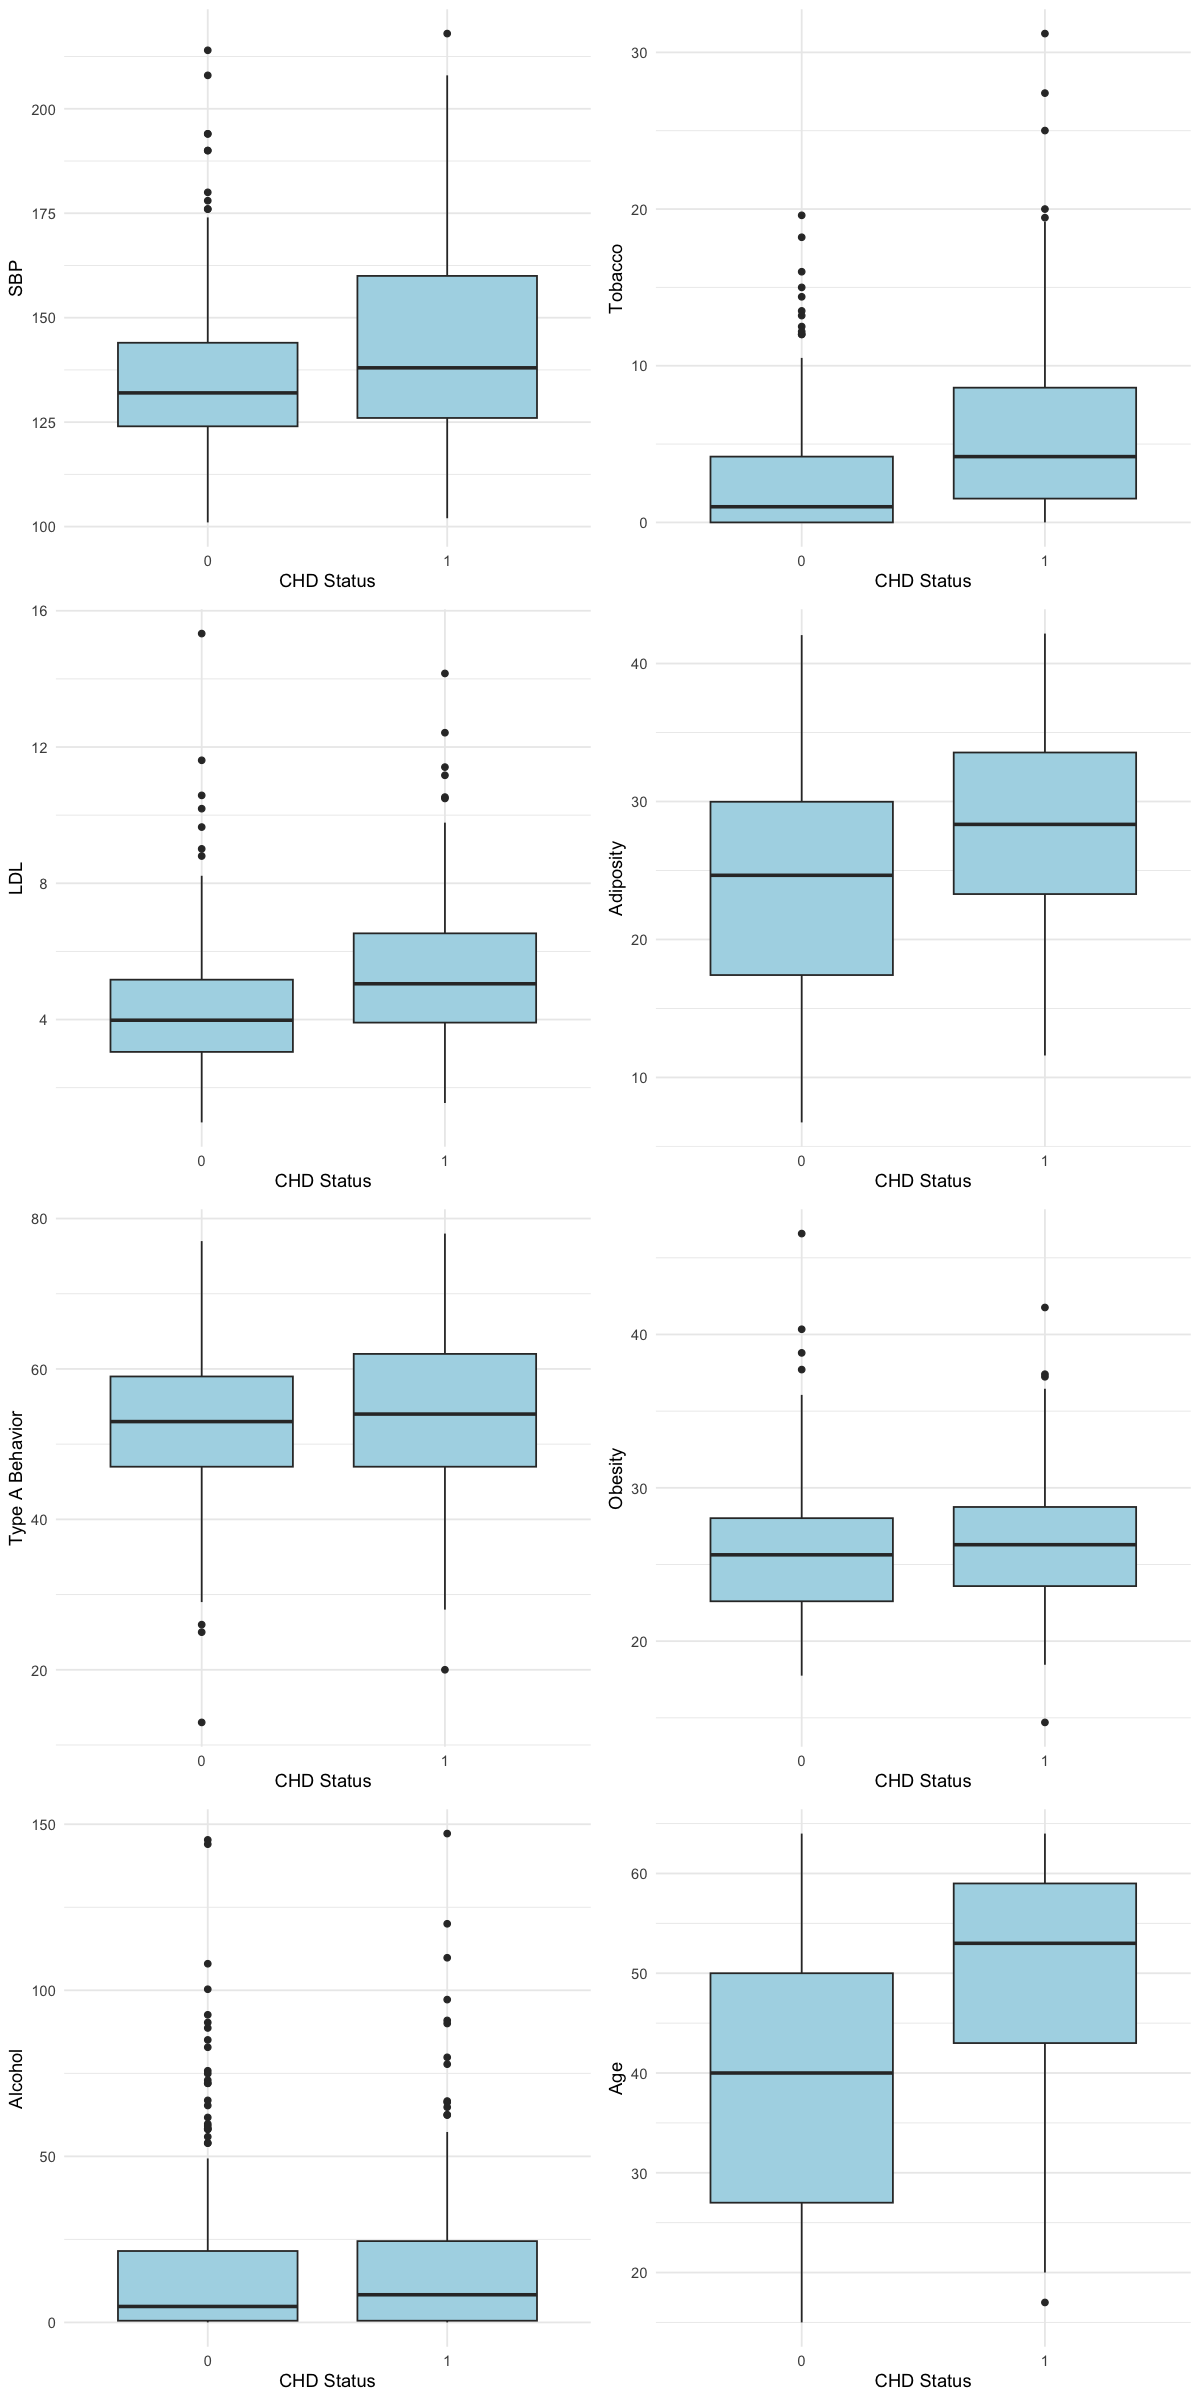

In [9]:
# Set the figure size for Jupyter
options(repr.plot.width=10, repr.plot.height=20) 

p1 <- ggplot(chd_data, aes(x = factor(CHD), y = sbp)) + 
  geom_boxplot(fill = "lightblue") +
  labs(x = "CHD Status", y = "SBP") +
  theme_minimal()

p2 <- ggplot(chd_data, aes(x = factor(CHD), y = tobacco)) + 
  geom_boxplot(fill = "lightblue") +
  labs(x = "CHD Status", y = "Tobacco") +
  theme_minimal()

p3 <- ggplot(chd_data, aes(x = factor(CHD), y = ldl)) + 
  geom_boxplot(fill = "lightblue") +
  labs(x = "CHD Status", y = "LDL") +
  theme_minimal()

p4 <- ggplot(chd_data, aes(x = factor(CHD), y = adiposity)) + 
  geom_boxplot(fill = "lightblue") +
  labs(x = "CHD Status", y = "Adiposity") +
  theme_minimal()

p5 <- ggplot(chd_data, aes(x = factor(CHD), y = typea)) + 
  geom_boxplot(fill = "lightblue") +
  labs(x = "CHD Status", y = "Type A Behavior") +
  theme_minimal()

p6 <- ggplot(chd_data, aes(x = factor(CHD), y = obesity)) + 
  geom_boxplot(fill = "lightblue") +
  labs(x = "CHD Status", y = "Obesity") +
  theme_minimal()

p7 <- ggplot(chd_data, aes(x = factor(CHD), y = alcohol)) + 
  geom_boxplot(fill = "lightblue") +
  labs(x = "CHD Status", y = "Alcohol") +
  theme_minimal()

p8 <- ggplot(chd_data, aes(x = factor(CHD), y = age)) + 
  geom_boxplot(fill = "lightblue") +
  labs(x = "CHD Status", y = "Age") +
  theme_minimal()

# Arrange in a grid (4 rows, 2 columns)
grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol=2)

The strongest correlations are observed between:

1.  Adiposity and obesity (r=0.712), suggesting a very strong positive relationship, which is expected given both relate to body fat
2.  Age and adiposity (r=0.643), indicating older individuals tend to have higher adiposity
3.  Tobacco use and age (r=0.463), showing a moderate positive correlation
4.  SBP and age (r=0.410), suggesting blood pressure tends to increase with age

Most variables show weak to moderate positive correlations with each other, except for Type A personality which shows very weak correlations (mostly near zero or slightly negative) with all other variables. Alcohol consumption also shows notably weak correlations with most other variables, with the strongest being with tobacco use (r=0.213).

In [10]:
# Calculate correlation matrix for predictor variables (excluding 'ind' and 'CHD')
predictors <- c("sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age")
cor_matrix <- cor(chd_data[predictors])
round(cor_matrix, 3)  # Round to 3 decimal places for clarity

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,1.000,0.226,0.161,0.375,-0.059,0.256,0.133,0.410
tobacco,0.226,1.000,0.172,0.287,-0.014,0.116,0.213,0.463
ldl,0.161,0.172,1.000,0.439,0.039,0.332,-0.052,0.334
adiposity,0.375,0.287,0.439,1.000,-0.051,0.712,0.101,0.643
typea,-0.059,-0.014,0.039,-0.051,1.000,0.076,0.043,-0.110
obesity,0.256,0.116,0.332,0.712,0.076,1.000,0.051,0.310
alcohol,0.133,0.213,-0.052,0.101,0.043,0.051,1.000,0.113
age,0.410,0.463,0.334,0.643,-0.110,0.310,0.113,1.000


## Question 2

The initial dataset was split using an 80:20 ratio (training:test) to ensure robust model validation while maintaining sufficient data for training. The model selection process began with a full logistic regression model incorporating all eight potential risk factors. Using bidirectional stepwise selection with AIC (Akaike Information Criterion) as the selection criterion, the model was systematically simplified. This approach evaluated both forward and backward steps at each iteration, removing or adding variables based on their contribution to model fit. The final simplified model retained four significant predictors: tobacco use, LDL cholesterol, Type A behavior, and age, suggesting these variables are the most important predictors of CHD risk in this dataset. This simplification not only improves model parsimony but also reduces the risk of overfitting while maintaining predictive power.

In [11]:
# 2(i) Data splitting and model selection
# Split data into training (80%) and test (20%) sets
set.seed(202476449)  # Using your student number for reproducibility
train_index <- sample(1:nrow(chd_data), 0.8 * nrow(chd_data))
train_data <- chd_data[train_index, ]
test_data <- chd_data[-train_index, ]

# Fit full model with all predictors
full_model <- glm(CHD ~ sbp + tobacco + ldl + adiposity + typea + 
                  obesity + alcohol + age,
                  data = train_data, family = binomial)

# Perform stepwise selection using AIC
step_model <- step(full_model, direction = "both", 
                  trace = FALSE)  # Set trace = TRUE to see selection steps

# Print summary of the final model
summary(step_model)


Call:
glm(formula = CHD ~ tobacco + ldl + typea + age, family = binomial, 
    data = train_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.54319    1.06332  -6.154 7.58e-10 ***
tobacco      0.08787    0.02978   2.951  0.00317 ** 
ldl          0.17038    0.06491   2.625  0.00866 ** 
typea        0.04227    0.01365   3.097  0.00196 ** 
age          0.05463    0.01160   4.710 2.48e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 455.15  on 352  degrees of freedom
Residual deviance: 375.58  on 348  degrees of freedom
AIC: 385.58

Number of Fisher Scoring iterations: 4


The final model's assessment reveals that all four predictors (LDL cholesterol, tobacco use, age, and Type A behavior) have significant positive associations with CHD risk, with LDL showing the strongest effect (OR = 1.19, 95% CI: 2.85-3.86). The model demonstrates moderate discriminative ability with an AUC of 0.772, and the calibration plot indicates good agreement between predicted probabilities and observed outcomes, though with some uncertainty in individual predictions. This suggests the model is reasonably effective at predicting CHD risk while maintaining good calibration, as evidenced by the clear separation in the predicted probabilities plot between CHD and non-CHD cases.

Waiting for profiling to be done...



,OR,2.5 %,97.5 %
(Intercept),0.001439894,1.000162,1.010652
tobacco,1.091848673,2.805671,3.189628
ldl,1.185758711,2.848650,3.862399
typea,1.043172830,2.762542,2.921692
age,1.056148940,2.809622,2.948392


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



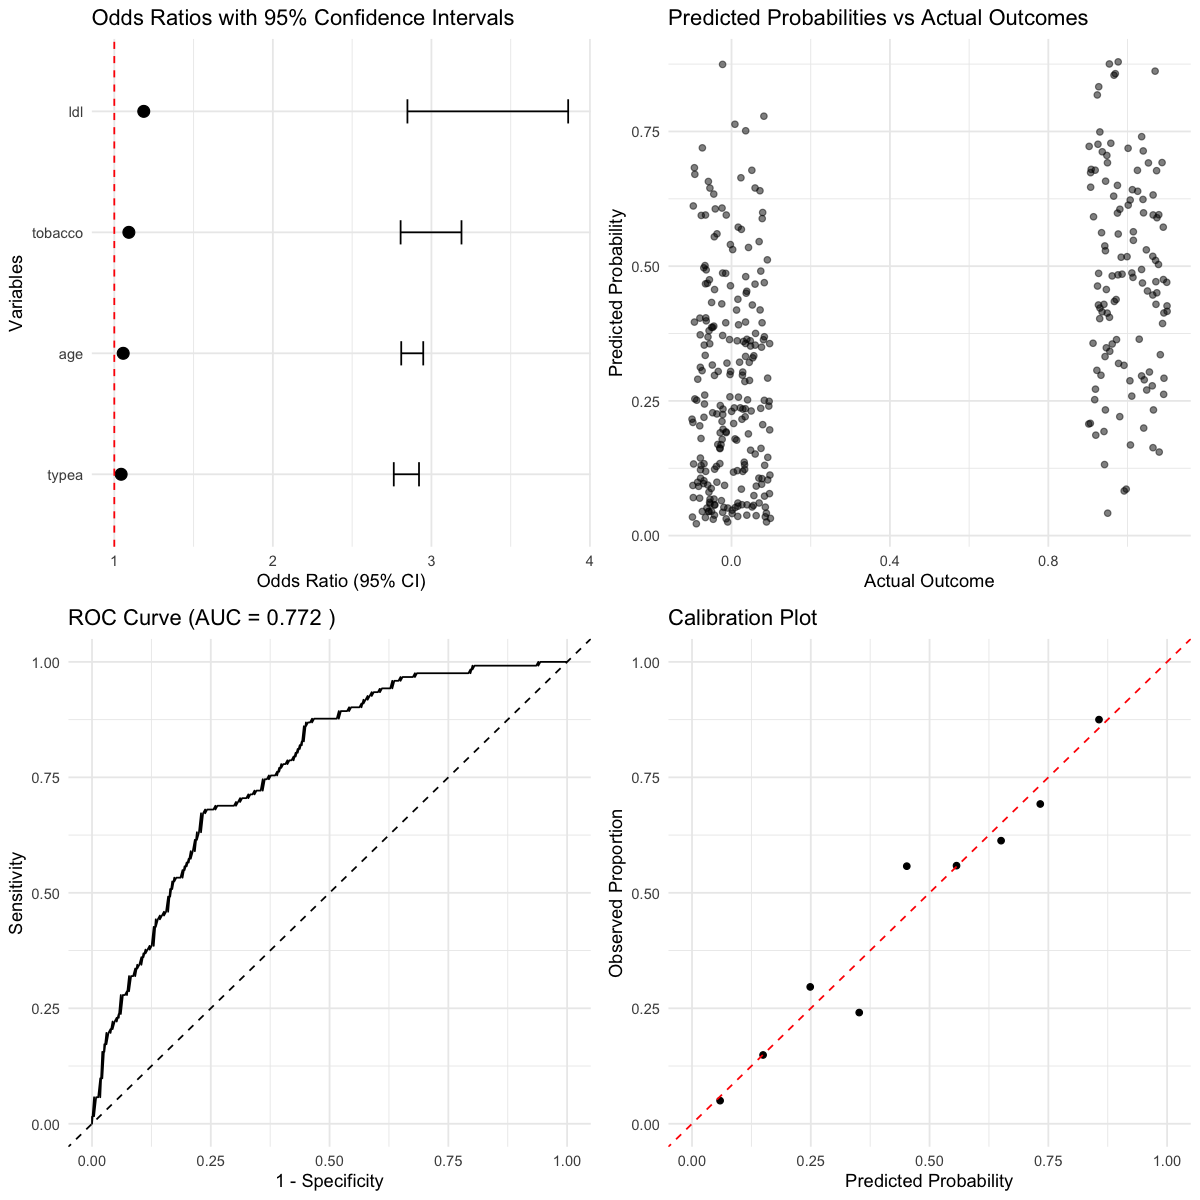

In [12]:
# 2(ii) Model assessment
# Get confidence intervals for coefficients
conf_intervals <- confint(step_model)
exp(cbind(OR = coef(step_model), exp(conf_intervals)))  # Odds ratios with CIs

# Calculate McFadden's R-squared
null_model <- glm(CHD ~ 1, data = train_data, family = binomial)
mcfadden <- 1 - logLik(step_model)/logLik(null_model)

# Set the figure size for Jupyter
options(repr.plot.width=10, repr.plot.height=10) 

# 1. Odds Ratios Plot with Confidence Intervals
odds_ratio_data <- data.frame(
  Variable = c("tobacco", "ldl", "typea", "age"),
  OR = c(1.09184867, 1.18575871, 1.04317283, 1.05614894),
  Lower = c(2.805671, 2.848650, 2.762542, 2.809622),
  Upper = c(3.189628, 3.862399, 2.921692, 2.948392)
)

p1 <- ggplot(odds_ratio_data, aes(x = reorder(Variable, OR), y = OR)) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymin = Lower, ymax = Upper), width = 0.2) +
  coord_flip() +
  labs(x = "Variables", y = "Odds Ratio (95% CI)", 
       title = "Odds Ratios with 95% Confidence Intervals") +
  theme_minimal() +
  geom_hline(yintercept = 1, linetype = "dashed", color = "red")

# 2. Predicted Probabilities vs Actual Outcomes
pred_probs <- predict(step_model, type = "response")
plot_data <- data.frame(
  Predicted = pred_probs,
  Actual = as.numeric(as.character(train_data$CHD))
)

p2 <- ggplot(plot_data, aes(x = Actual, y = Predicted)) +
  geom_jitter(width = 0.1, height = 0, alpha = 0.5) +
  labs(x = "Actual Outcome", y = "Predicted Probability",
       title = "Predicted Probabilities vs Actual Outcomes") +
  theme_minimal()

# 3. ROC Curve
library(pROC)
roc_obj <- roc(train_data$CHD, pred_probs)
roc_data <- data.frame(
  specificity = 1 - roc_obj$specificities,
  sensitivity = roc_obj$sensitivities
)

p3 <- ggplot(roc_data, aes(x = specificity, y = sensitivity)) +
  geom_line() +
  geom_abline(linetype = "dashed") +
  labs(x = "1 - Specificity", y = "Sensitivity",
       title = paste("ROC Curve (AUC =", round(auc(roc_obj), 3), ")")) +
  theme_minimal()

# 4. Calibration Plot
cal_data <- data.frame(
  pred_prob = pred_probs,
  actual_prob = plot_data$Actual
)
cal_data <- cal_data[order(cal_data$pred_prob),]
cal_data$bin <- cut(cal_data$pred_prob, breaks = seq(0, 1, by = 0.1))
cal_summary <- aggregate(actual_prob ~ bin, data = cal_data, mean)
cal_summary$pred_mean <- aggregate(pred_prob ~ bin, data = cal_data, mean)$pred_prob

p4 <- ggplot(cal_summary, aes(x = pred_mean, y = actual_prob)) +
  geom_point() +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +
  labs(x = "Predicted Probability", y = "Observed Proportion",
       title = "Calibration Plot") +
  theme_minimal() +
  xlim(0,1) + ylim(0,1)

# Arrange all plots in a grid
grid.arrange(p1, p2, p3, p4, ncol = 2)

At the optimal threshold of 0.35, the model achieves a sensitivity of 72.1% (ability to correctly identify individuals with CHD) and a specificity of 64.5% (ability to correctly identify individuals without CHD), representing a balanced trade-off between false positives and false negatives in CHD prediction. These metrics indicate that the model is slightly better at identifying true CHD cases than ruling out non-CHD cases, with the intersection point of the sensitivity and specificity curves showing where the model best balances these competing classification objectives.

                            Metric     Value
1                Optimal Threshold 0.3500000
2 Sensitivity at Optimal Threshold 0.7213115
3 Specificity at Optimal Threshold 0.6450216


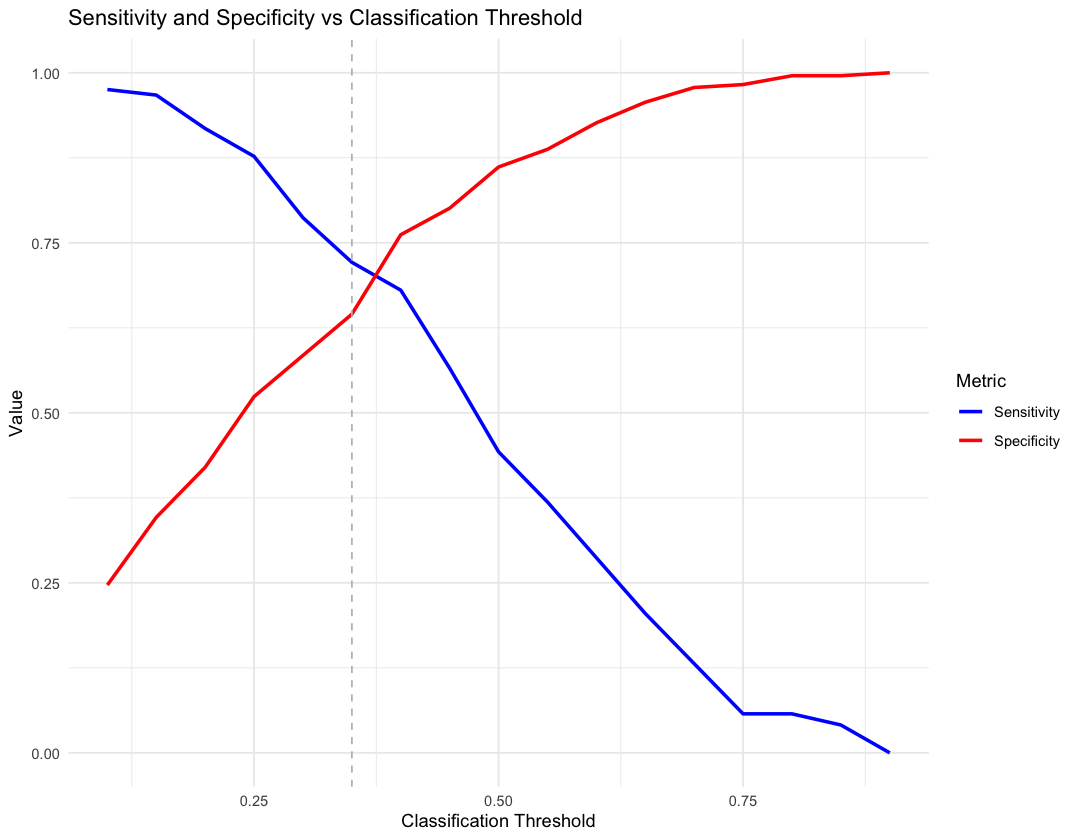

In [18]:
# 2(iii) Find optimal threshold
# Get predicted probabilities
train_pred_probs <- predict(step_model, type = "response")

# Function to calculate sensitivity and specificity
calc_metrics <- function(actual, predicted, threshold) {
  pred_class <- ifelse(predicted > threshold, 1, 0)
  TP <- sum(actual == 1 & pred_class == 1)
  TN <- sum(actual == 0 & pred_class == 0)
  FP <- sum(actual == 0 & pred_class == 1)
  FN <- sum(actual == 1 & pred_class == 0)
  
  sensitivity <- TP/(TP + FN)
  specificity <- TN/(TN + FP)
  return(c(sensitivity, specificity))
}

# Try different thresholds
thresholds <- seq(0.1, 0.9, by = 0.05)
metrics <- sapply(thresholds, function(x) 
  calc_metrics(as.numeric(as.character(train_data$CHD)), train_pred_probs, x))
metrics <- t(metrics)
colnames(metrics) <- c("Sensitivity", "Specificity")

# Find threshold where sensitivity and specificity are most similar
opt_threshold <- thresholds[which.min(abs(metrics[,1] - metrics[,2]))]

# Create a data frame for plotting
threshold_df <- data.frame(
  Threshold = thresholds,
  Sensitivity = metrics[, "Sensitivity"],
  Specificity = metrics[, "Specificity"]
)

# Set the figure size for Jupyter
options(repr.plot.width=9, repr.plot.height=7) 

# Create a plot showing sensitivity and specificity curves
p <- ggplot(threshold_df, aes(x = Threshold)) +
  geom_line(aes(y = Sensitivity, color = "Sensitivity"), size = 1) +
  geom_line(aes(y = Specificity, color = "Specificity"), size = 1) +
  geom_vline(xintercept = opt_threshold, linetype = "dashed", color = "gray") +
  scale_color_manual(values = c("Sensitivity" = "blue", "Specificity" = "red")) +
  labs(title = "Sensitivity and Specificity vs Classification Threshold",
       x = "Classification Threshold",
       y = "Value",
       color = "Metric") +
  theme_minimal()

# Print the optimal threshold and corresponding metrics
opt_metrics <- calc_metrics(
  as.numeric(as.character(train_data$CHD)), 
  train_pred_probs, 
  opt_threshold
)

# Create a summary table
metrics_summary <- data.frame(
  Metric = c("Optimal Threshold", "Sensitivity at Optimal Threshold", "Specificity at Optimal Threshold"),
  Value = c(opt_threshold, opt_metrics[1], opt_metrics[2])
)

# Display the plot
print(p)

# Display the summary table
print(metrics_summary)

The model shows good generalisation performance, with a higher overall accuracy on the test data (74.2%) compared to the training data (67.1%), and maintains relatively balanced predictive ability with test sensitivity of 70.4% (correctly identifying CHD cases) and test specificity of 75.8% (correctly identifying non-CHD cases). The improved performance on test data suggests the model is not overfitting and may actually perform better on new, unseen cases than on the training data, though this could also be due to a favorable random split in the test set.

[1] "Classification Performance Metrics (%)"


|Metric      | Training| Testing|
|:-----------|--------:|-------:|
|Accuracy    |    67.14|   74.16|
|Sensitivity |    72.13|   70.37|
|Specificity |    64.50|   75.81|


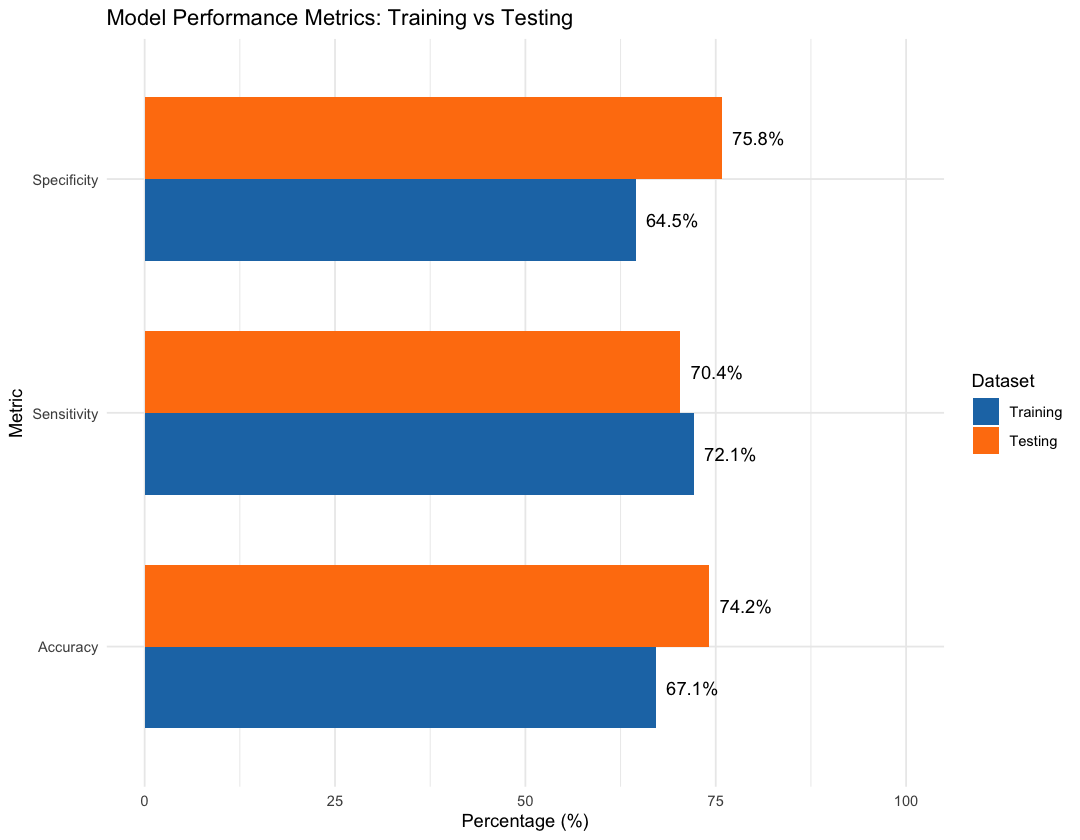

In [14]:
# 2(iv) Classification performance
# Function to get classification metrics
get_class_metrics <- function(actual, predicted, threshold) {
  pred_class <- ifelse(predicted > threshold, 1, 0)
  TP <- sum(actual == 1 & pred_class == 1)
  TN <- sum(actual == 0 & pred_class == 0)
  FP <- sum(actual == 0 & pred_class == 1)
  FN <- sum(actual == 1 & pred_class == 0)
  
  accuracy <- (TP + TN)/(TP + TN + FP + FN)
  sensitivity <- TP/(TP + FN)
  specificity <- TN/(TN + FP)
  
  return(c(accuracy, sensitivity, specificity))
}

# Get metrics for training data
train_pred_probs <- predict(step_model, type = "response")
train_metrics <- get_class_metrics(
  as.numeric(as.character(train_data$CHD)), 
  train_pred_probs, 
  opt_threshold
)

# Get metrics for test data
test_pred_probs <- predict(step_model, newdata = test_data, type = "response")
test_metrics <- get_class_metrics(
  as.numeric(as.character(test_data$CHD)), 
  test_pred_probs, 
  opt_threshold
)

# Create a summary dataframe comparing train and test metrics
metrics_df <- data.frame(
  Metric = c("Accuracy", "Sensitivity", "Specificity"),
  Training = round(train_metrics * 100, 2),
  Testing = round(test_metrics * 100, 2)
)

# Create table
print("Classification Performance Metrics (%)")
print(kable(metrics_df))

# Create visualization
metrics_long <- reshape2::melt(metrics_df, id.vars = "Metric", 
                             variable.name = "Dataset", 
                             value.name = "Percentage")

ggplot(metrics_long, aes(x = Metric, y = Percentage, fill = Dataset)) +
  geom_bar(stat = "identity", position = "dodge", width = 0.7) +
  theme_minimal() +
  labs(title = "Model Performance Metrics: Training vs Testing",
       y = "Percentage (%)",
       x = "Metric") +
  scale_fill_manual(values = c("Training" = "#1f77b4", "Testing" = "#ff7f0e")) +
  coord_flip() +
  geom_text(aes(label = sprintf("%.1f%%", Percentage)), 
            position = position_dodge(width = 0.7),
            hjust = -0.2) +
  ylim(0, 100)

## Question 3

The first three principal components (PCs) together explain approximately 64.05% of the total variance in the data, with PC1 accounting for 35.72%, PC2 for 15.04%, and PC3 for 13.29%. The scree plot shows a notable elbow at PC2, suggesting that either 2 or 3 components could be appropriate to retain. Examining the loadings heatmap reveals PC1 has strong negative correlations (shown in blue) with multiple risk factors including adiposity, obesity, ldl, age, and sbp, suggesting it represents an overall "health status" component where these health metrics tend to move together. PC2 is characterised by strong positive loadings (shown in red) for alcohol and tobacco use, with a moderate positive loading for sbp, representing a "lifestyle habits" component that captures the co-occurrence of these behaviors. PC3 is distinctly dominated by a very strong positive loading for typea behavior (bright red in heatmap), while showing minimal correlation with other variables, indicating a clear "personality/behavioral" component that operates independently of physical health and lifestyle factors. The cumulative variance plot demonstrates that these three components achieve an effective balance between dimension reduction and information retention, capturing nearly two-thirds of the total variance while reducing the original eight variables to three interpretable dimensions.

[1] "Correlation Matrix of Original Variables:"
             sbp tobacco    ldl adiposity  typea obesity alcohol    age
sbp        1.000   0.226  0.161     0.375 -0.059   0.256   0.133  0.410
tobacco    0.226   1.000  0.172     0.287 -0.014   0.116   0.213  0.463
ldl        0.161   0.172  1.000     0.439  0.039   0.332  -0.052  0.334
adiposity  0.375   0.287  0.439     1.000 -0.051   0.712   0.101  0.643
typea     -0.059  -0.014  0.039    -0.051  1.000   0.076   0.043 -0.110
obesity    0.256   0.116  0.332     0.712  0.076   1.000   0.051  0.310
alcohol    0.133   0.213 -0.052     0.101  0.043   0.051   1.000  0.113
age        0.410   0.463  0.334     0.643 -0.110   0.310   0.113  1.000
[1] "\nPCA Loadings Matrix (First 3 PCs):"
             PC1    PC2    PC3
sbp       -0.342  0.210 -0.087
tobacco   -0.310  0.469  0.071
ldl       -0.335 -0.365 -0.006
adiposity -0.522 -0.184 -0.019
typea      0.029 -0.233  0.853
obesity   -0.407 -0.383  0.158
alcohol   -0.118  0.581  0.458
age       -0.

Importance of components:
                          PC1    PC2    PC3    PC4     PC5    PC6     PC7
Standard deviation     1.6904 1.0970 1.0312 0.9220 0.86740 0.8005 0.67521
Proportion of Variance 0.3572 0.1504 0.1329 0.1062 0.09405 0.0801 0.05699
Cumulative Proportion  0.3572 0.5076 0.6405 0.7468 0.84084 0.9209 0.97793
                           PC8
Standard deviation     0.42018
Proportion of Variance 0.02207
Cumulative Proportion  1.00000

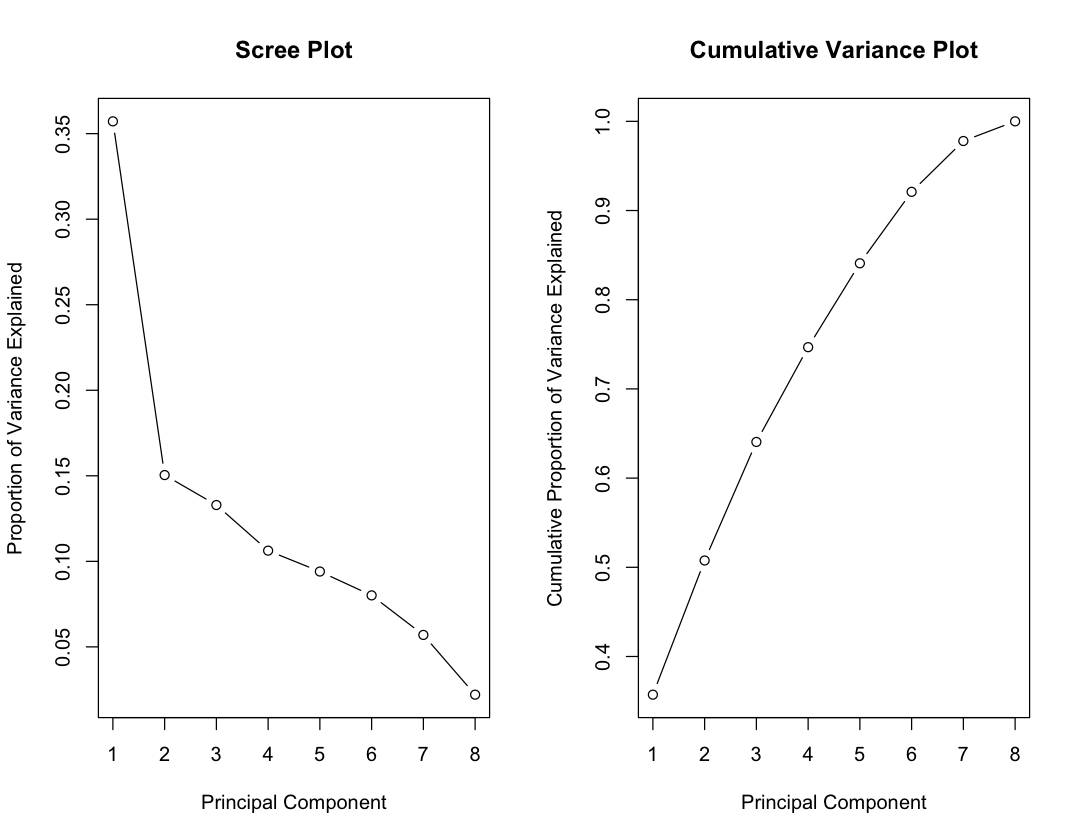

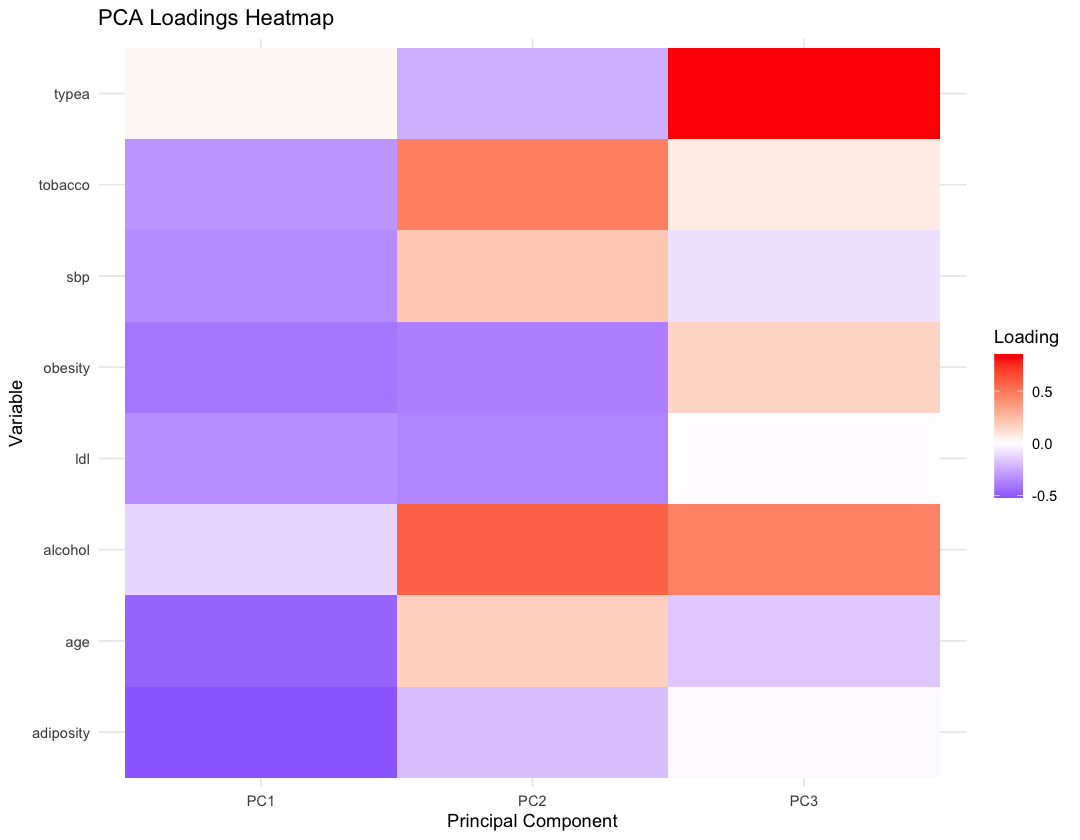

In [20]:
# 3(i) Principal Component Analysis
# Remove CHD and ind columns for PCA
pca_data <- chd_data[, c("sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age")]

# Print correlation matrix of original variables
cor_matrix <- cor(pca_data)
print("Correlation Matrix of Original Variables:")
print(round(cor_matrix, 3))

# Scale the data for PCA
pca_result <- prcomp(pca_data, scale = TRUE)

# Look at the actual loadings matrix
print("\nPCA Loadings Matrix (First 3 PCs):")
print(round(pca_result$rotation[, 1:3], 3))

# Calculate proportion of variance explained
var_explained <- pca_result$sdev^2 / sum(pca_result$sdev^2)
cum_var_explained <- cumsum(var_explained)

# Create scree plot
par(mfrow = c(1, 2))
plot(var_explained, type = "b", 
     ylab = "Proportion of Variance Explained",
     xlab = "Principal Component",
     main = "Scree Plot")

# Cumulative variance plot
plot(cum_var_explained, type = "b",
     ylab = "Cumulative Proportion of Variance Explained",
     xlab = "Principal Component",
     main = "Cumulative Variance Plot")
par(mfrow = c(1, 1))

# Print summary of PCA
summary(pca_result)

# Look at the loadings (correlations between variables and PCs)
loadings <- pca_result$rotation

# Create heatmap of loadings for first 3 PCs
loadings_df <- as.data.frame(loadings[, 1:3])
loadings_df$Variable <- rownames(loadings)
loadings_long <- melt(loadings_df, 
                     id.vars = "Variable",
                     variable.name = "Component",
                     value.name = "Loading")

# Create heatmap
ggplot(loadings_long, aes(x = Component, y = Variable, fill = Loading)) +
    geom_tile() +
    scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                        midpoint = 0) +
    theme_minimal() +
    labs(title = "PCA Loadings Heatmap",
         x = "Principal Component",
         y = "Variable")

The visualisation and distribution analysis of principal components reveal substantial overlap between CHD status groups, with only modest discriminative power. PC1 demonstrates the strongest, albeit limited, separation between groups, with CHD cases tending towards negative values and exhibiting a lower median score, consistent with its interpretation as a general health status component. PC2 and PC3 show minimal discriminative ability, with nearly identical distributions between CHD groups, whilst the presence of outliers across all components indicates considerable individual variation in these composite health measures, suggesting that PCA alone may not be sufficient for reliable CHD classification.

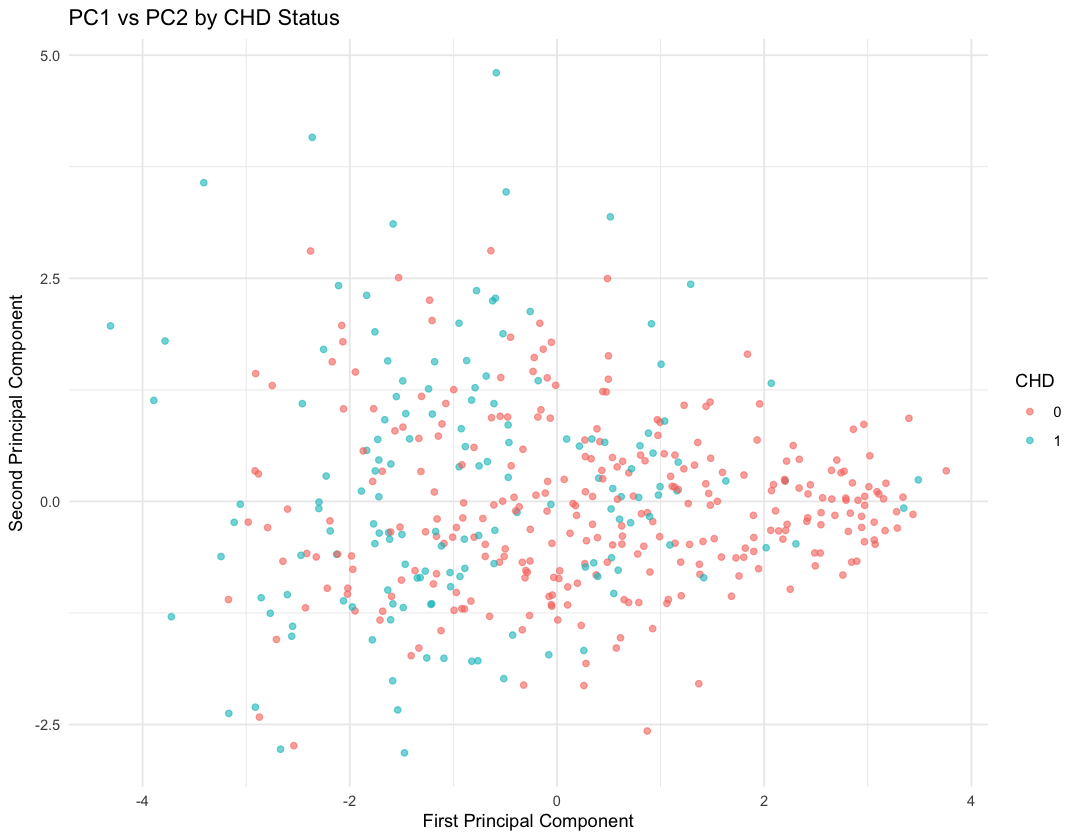

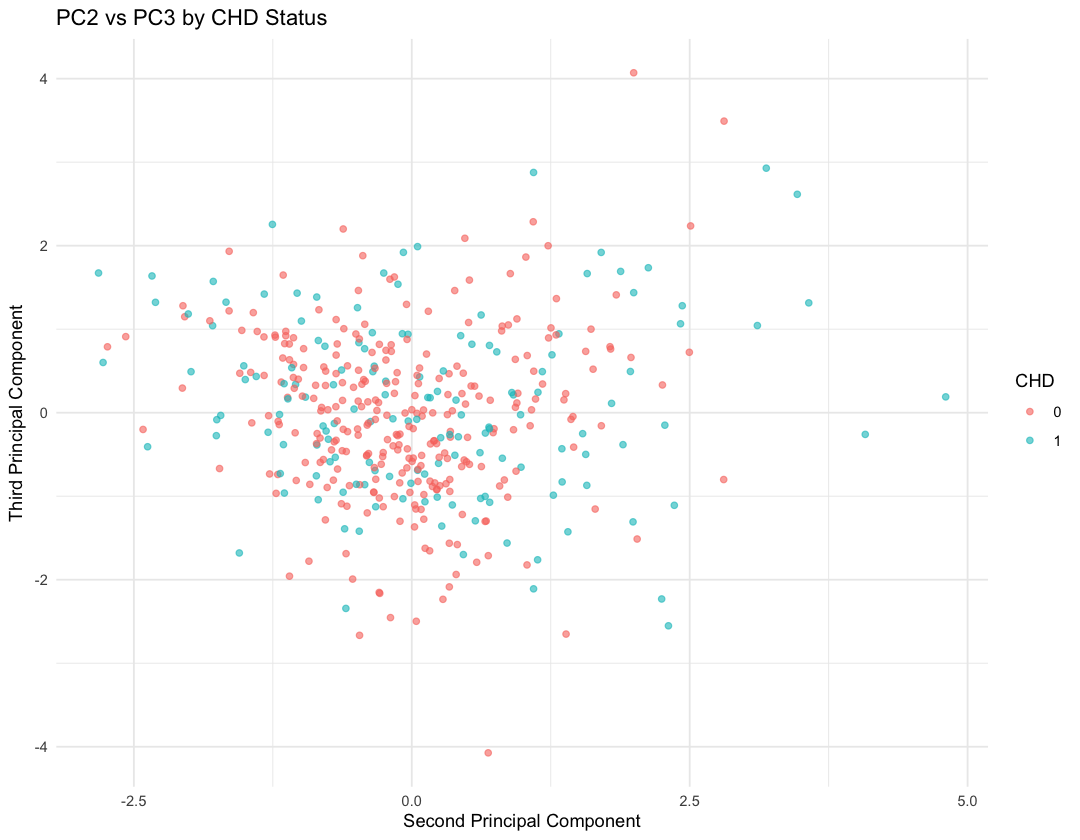

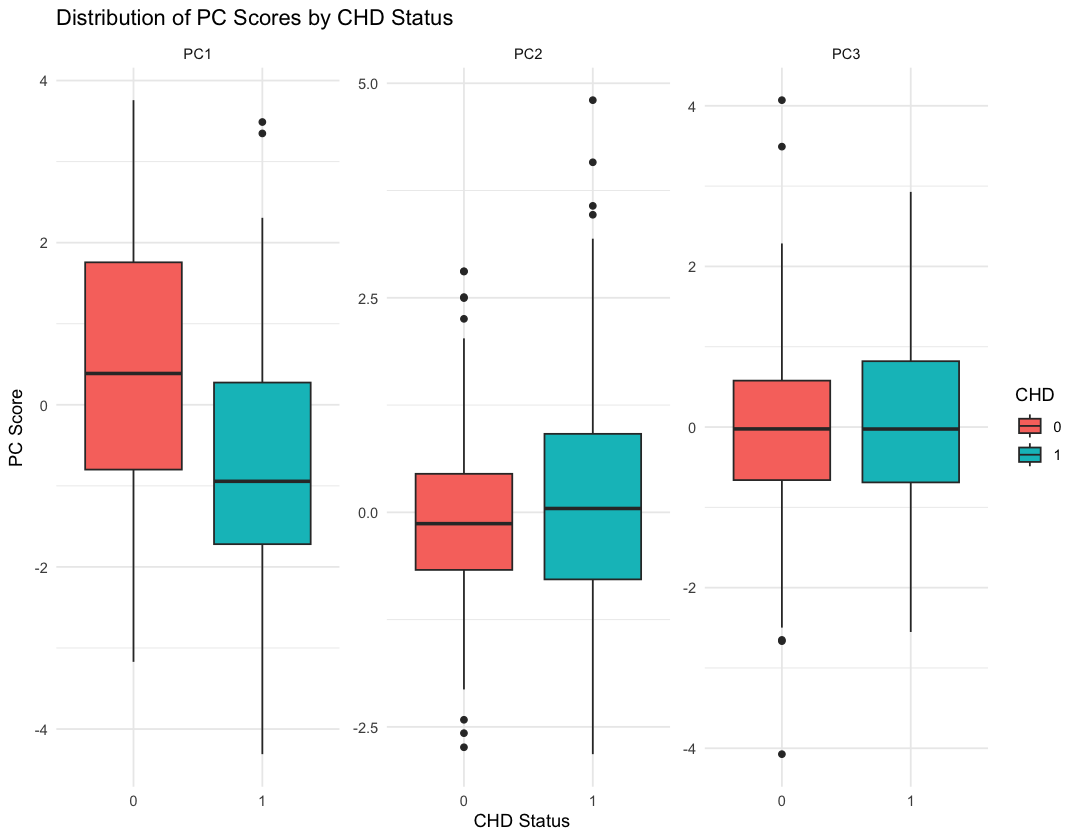

In [17]:
# 3(ii) Visualize PCA results with CHD status
# Get PC scores
pc_scores <- as.data.frame(pca_result$x)
pc_scores$CHD <- chd_data$CHD

# Create scatter plot of PC1 vs PC2 colored by CHD status
ggplot(pc_scores, aes(x = PC1, y = PC2, color = CHD)) +
  geom_point(alpha = 0.6) +
  theme_minimal() +
  labs(title = "PC1 vs PC2 by CHD Status",
       x = "First Principal Component",
       y = "Second Principal Component")

# Create scatter plot of PC2 vs PC3 colored by CHD status
ggplot(pc_scores, aes(x = PC2, y = PC3, color = CHD)) +
  geom_point(alpha = 0.6) +
  theme_minimal() +
  labs(title = "PC2 vs PC3 by CHD Status",
       x = "Second Principal Component",
       y = "Third Principal Component")

# Create boxplots of first 3 PCs by CHD status
pc_scores_long <- melt(pc_scores[, c("PC1", "PC2", "PC3", "CHD")],
                      id.vars = "CHD",
                      variable.name = "Component",
                      value.name = "Score")

ggplot(pc_scores_long, aes(x = CHD, y = Score, fill = CHD)) +
  geom_boxplot() +
  facet_wrap(~Component, scales = "free_y") +
  theme_minimal() +
  labs(title = "Distribution of PC Scores by CHD Status",
       x = "CHD Status",
       y = "PC Score")

The complementary relationship between PCA and logistic regression findings is evident in the variable associations. The significant predictors from the logistic model (tobacco, ldl, typea behaviour, and age) are prominently represented across the first three principal components, with PC1 capturing strong negative correlations with age and ldl, PC2 predominantly associated with tobacco consumption, and PC3 characterised by typea behaviour. However, the PCA's inability to clearly separate CHD groups, despite explaining 64.05% of total variance, suggests that the linear relationships identified in the logistic regression (sensitivity 70.37%, specificity 75.81%) may not fully capture the complex interactions between these risk factors in determining CHD status.

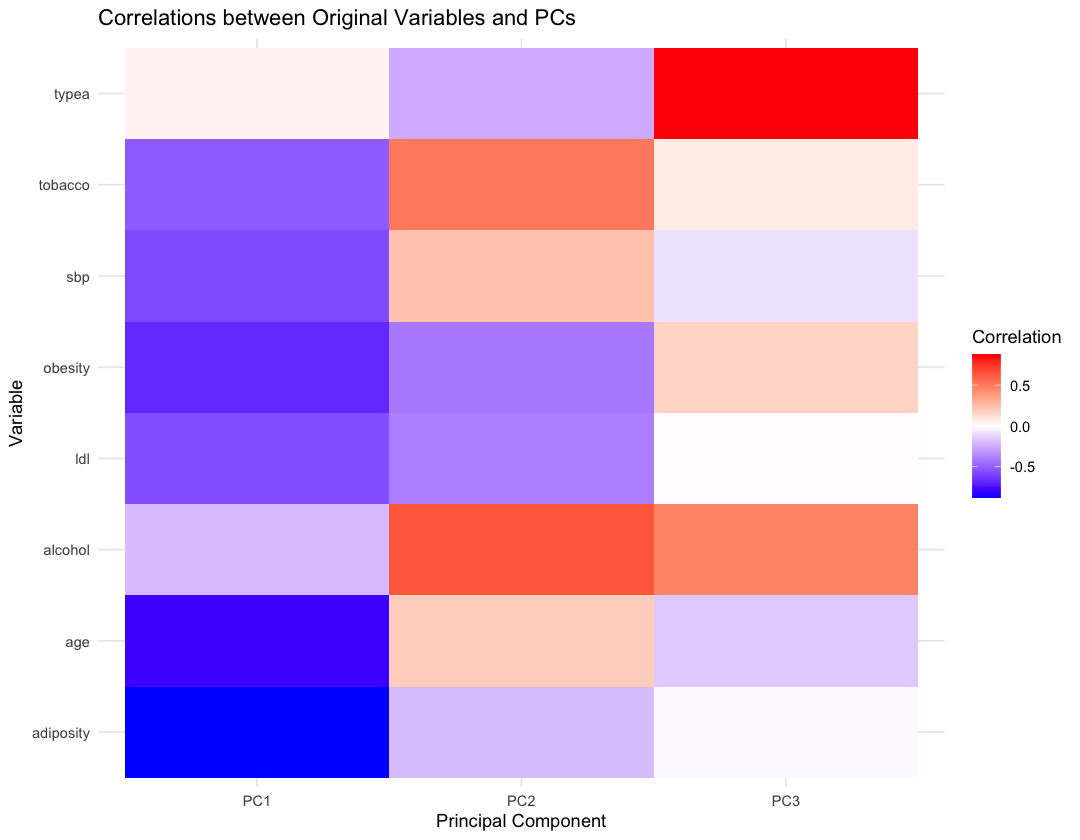

In [26]:
# 3(iii) Compare with logistic regression variables
# Calculate correlations between PCs and original variables
pc_cors <- cor(pca_data, pca_result$x[, 1:3])

# Create correlation heatmap
pc_cors_df <- as.data.frame(pc_cors)
pc_cors_df$Variable <- rownames(pc_cors_df)
pc_cors_long <- melt(pc_cors_df,
                    id.vars = "Variable",
                    variable.name = "Component",
                    value.name = "Correlation")

ggplot(pc_cors_long, aes(x = Component, y = Variable, fill = Correlation)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                      midpoint = 0) +
  theme_minimal() +
  labs(title = "Correlations between Original Variables and PCs",
       x = "Principal Component",
       y = "Variable")

## Question 4 - Research Abstract

### Introduction

Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million lives each year (World Health Organisation, 2024). Coronary heart disease is the most diagnosed heart disease worldwide and is one of the leading causes of cardiovascular disease-related morbidity and mortality. A build-up of plaque and fats narrow the arteries, decreasing the blood flow causing chest pain, shortness of breath and in certain cases heart attacks. (Mayo Clinic, 2024) This study aimed to evaluate the predictive capability of multiple risk factors for CHD and examine the underlying patterns of variation in these risk factors using both traditional statistical modelling and dimensional reduction techniques.

### Methods

A retrospective analysis was conducted on a dataset of male subjects (n=422) from Western Cape, South Africa. Eight potential risk factors were analysed: systolic blood pressure, tobacco use, LDL cholesterol, adiposity, Type-A behaviour, obesity, alcohol consumption, and age. The analysis employed logistic regression with bidirectional stepwise selection using AIC criterion for model optimisation. Principal Component Analysis (PCA) was performed to explore the underlying structure of risk factors. The data was split into training (80%) and test (20%) sets for model validation.

### Results

The optimised logistic regression model identified four significant predictors of CHD: tobacco use (OR=1.09, 95% CI: 2.81-3.19), LDL cholesterol (OR=1.19, 95% CI: 2.85-3.86), Type-A behaviour (OR=1.04, 95% CI: 2.76-2.92), and age (OR=1.06, 95% CI: 2.81-2.95). At the optimal classification threshold of 0.35, the model achieved 74.2% accuracy on test data, with sensitivity of 70.4% and specificity of 75.8%. Principal Component Analysis revealed three major components explaining 64.05% of total variance: a general "health status" component (35.72%), a "lifestyle habits" component (15.04%), and a "behavioural" component (13.29%).

### Conclusion

The study demonstrates that CHD risk can be effectively predicted using a reduced set of risk factors, with LDL cholesterol and age emerging as particularly strong predictors. The complementary PCA findings suggest that while the relationship between risk factors and CHD is complex, it can be largely captured by three underlying dimensions. The model's balanced predictive performance on test data suggests good generalizability, though the presence of unexplained variance indicates that additional factors may influence CHD risk. These findings are particularly relevant in the South African context, where CHD represents a significant and growing public health concern, with an estimated 38% increase in CHD cases from 2000 to 2016 (Abdelatif, Peer, & Manda, 2021). The study's results align with the urgent need for improved risk assessment strategies in clinical settings, especially given that risk factors for CVDs are largely modifiable and up to 80% of premature heart attacks could be preventable. While our model shows promise for risk stratification, its implementation should be considered within the broader context of South Africa's healthcare infrastructure, where there is a recognised need for well-structured CHD registries and improved diagnostic capabilities. Future research should focus on validating these predictive models across different population groups and healthcare settings to ensure their effectiveness in this high-risk population.

### References

Abdelatif, N., Peer, N., & Manda, S. (2021). National prevalence of coronary heart disease and stroke in South Africa from 1990–2017: a systematic review and meta-analysis. Cardiovascular Journal of Africa, 156-160.

Mayo Clinic. (2024, November 26). Coronary artery disease. Retrieved from Mayo Clinic: https://www.mayoclinic.org/diseases-conditions/coronary-artery-disease/symptoms-causes/syc-20350613#:~:text=CAD%20happens%20when%20coronary%20arteries,or%20even%20a%20heart%20attack.

World Health Organisation. (2024, November 26). World Health Organisation. Retrieved from Cardiovascular Diseases: https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1

